# 기계학습

### 담당교수 : 장원중

In [1]:
# 그래프 한글이 깨질때 & 마이너스 부호 사용

import sys, os
from matplotlib import font_manager, rc 
import matplotlib.pyplot as plt

# 한글 폰트 설정 : 윈도우 폰트를 사용하는 경우 
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name) 

# 운영체제별 한글 폰트 설정
# if os.name == 'posix': # Mac 환경 폰트 설정
#     rc('font', family='AppleGothic')
# elif os.name == 'nt': # Windows 환경 폰트 설정
#     rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 유니코드에서 음수 부호설정
rc('axes', unicode_minus=False)

# 부모 디렉터리의 파일을 가져올 수 있도록 설정
sys.path.append(os.pardir)     

# jupyter에서 matplotlib 그래프를 출력 영역에 표시  
%matplotlib inline 

# 레티나 설정 - 폰트 주변이 흐릿하게 보이는 것을 방지해 글씨가 좀 더 선명하게 보임
%config InlineBackend.figure_format = 'retina'

In [2]:
# 운영체제별 이름 

import platform

platform.system()

'Windows'

In [3]:
# 파이썬 버전 확인

import sys
import platform

print("--sys.version—")
print(sys.version)

print("--python_version—")
print(platform.python_version())

--sys.version—
3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
--python_version—
3.11.7


# 모델 일반화 전략

## iris 데이터 셋 

In [11]:
#  iris 데이터 불러오기

from sklearn.datasets import load_iris

iris = load_iris()

print(iris.feature_names) # ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
print(iris.target_names)  # ['setosa' 'versicolor' 'virginica']

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [12]:
# 분석의 용이성을 위해 pandas의 DataFrame으로 변환 

import pandas as pd

df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
# 타겟 데이터도 Seried 구조로 변환 

target = pd.Series(iris.target, dtype="category")
target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Length: 150, dtype: category
Categories (3, int64): [0, 1, 2]

In [14]:
# 타겟값을 숫자에서 문자열('setosa', 'versicolor', 'virginica')로 수정

target =target.cat.rename_categories(iris.target_names)
print(target)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Length: 150, dtype: category
Categories (3, object): ['setosa', 'versicolor', 'virginica']


In [15]:
# 독립변수로 구성된 데이터프레임에 종속변수 속성을 추가 

df_iris["species"] = target
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [16]:
# 열이름 수정

df_iris.rename({"sepal length (cm)":"sepal_length", "sepal width (cm)": "sepal_width", 
                "petal length (cm)":"petal_length", "petal width (cm)":"petal_width"}, axis=1, inplace=True)
df_iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
# 결측값 확인  

df_iris.isna().sum(axis=0)

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [18]:
# sklearn의 train_test_split 함수로 훈련용 데이터셋(70%)과 성능평가용 데이터셋(30) 분할 

#  scikit-learn model_selection 모듈은 train_test_split 함수로 X_train, X_test, y_train, y_test 데이터셋을 분할

# train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None,)
#  - stratify : 층 구분 변수이름을 입력, 이때 각 층(stratum, group) 별로 나누어서 test_size 비율을 적용해서 추출 
#  - test_size : test set의 비율 
#  - shuffle=True : 무작위 추출(random sampling) / shuffle=False : 체계적 추출(systematic sampling) 
#  - random_state : 재현가능성을 위해서 난수 초기값으로 아무 숫자나 지정

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_iris.iloc[:, :-1], 
                                                    df_iris.iloc[:, -1], 
                                                    test_size=0.3, 
                                                    shuffle=True,               # shuffle=True : 무작위 추출(random sampling)
                                                    stratify=df_iris['species'], # stratify : 층 구분 변수이름 
                                                    random_state=42)             # 데이터셋 분할결과를 반환 

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(105, 4) (45, 4) (105,) (45,)
setosa        35
versicolor    35
virginica     35
Name: species, dtype: int64
setosa        15
versicolor    15
virginica     15
Name: species, dtype: int64


## 의사결정나무 모델 생성 및 학습

In [19]:
# 데이터 분석 결과를 토대로 적합한 알고리즘을 선택

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=1234) # 모델 생성  
model.fit(X_train, y_train)                       # 학습 

DecisionTreeClassifier(random_state=1234)

In [22]:
# 성능평가용 데이터셋을 이용해 성능을 평가 
# scikit-learn에서 accuracy_score 함수는 accuray(정확도)를 반환 

import numpy as np 
from sklearn.metrics import accuracy_score

pred = model.predict(X_test)
accuracy = np.round(accuracy_score(y_test, pred), 4)
print('\n## 검증 정확도:', accuracy)  # 검증 정확도: 0.9778


## 검증 정확도: 0.9778


## K-겹 교차 검증(K-fold cross-validation)

In [24]:
# 성능평가용 데이터셋을 이용해 성능을 평가 
# scikit-learn에서 cross_val_score 함수는 accuray(정확도)를 반환 

from sklearn.model_selection import cross_val_score
import numpy as np 
from sklearn.model_selection import StratifiedShuffleSplit

cv = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
results = cross_val_score(model, df_iris.iloc[:, :-1], df_iris.iloc[:, -1], cv=cv)
fin_result = np.round(np.mean(results), 4) 

for i, _ in enumerate(results):
    print("{}번째 교차검증 정확도: {}".format(i, _))
    
print("교차검증 최종 정확도: {}".format(fin_result))

0번째 교차검증 정확도: 0.9555555555555556
1번째 교차검증 정확도: 0.9333333333333333
2번째 교차검증 정확도: 0.9555555555555556
3번째 교차검증 정확도: 0.9555555555555556
4번째 교차검증 정확도: 0.9555555555555556
5번째 교차검증 정확도: 0.9555555555555556
6번째 교차검증 정확도: 0.9333333333333333
7번째 교차검증 정확도: 0.9777777777777777
8번째 교차검증 정확도: 0.9777777777777777
9번째 교차검증 정확도: 0.9333333333333333
교차검증 최종 정확도: 0.9533


## 모델 최적화 전략을 위한 GridSearchCV를 이용한 하이퍼 파라미터 탐색

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

cv = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
estimator = DecisionTreeClassifier()
parameters = {'max_depth' : [4,5,6,10], 'criterion' : ['gini', 'entropy'], 'splitter' : ['best', 'random'],
              'min_weight_fraction_leaf' : [0.0, 0.1, 0.2, 0.3], 'random_state' : [7, 23, 42, 78],
              'min_impurity_decrease': [0.0, 0.05, 0.1, 0.2]} 

model = GridSearchCV(estimator=estimator, param_grid=parameters, cv=cv, verbose=-1, n_jobs=-1, refit=True)
model.fit(df_iris.iloc[:, :-1], df_iris.iloc[:, -1])

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.3,
            train_size=None),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 10],
                         'min_impurity_decrease': [0.0, 0.05, 0.1, 0.2],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3],
                         'random_state': [7, 23, 42, 78],
                         'splitter': ['best', 'random']},
             verbose=-1)

In [40]:
# GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, 
#              pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False, )

# GridSearCV로 찾은 최적의 파라미터와 최적화된 성능은 best_params_와 best_score_ 속성에 기록된다. 
# refit 옵션을 True로 했을 경우, 찾아낸 최적의 하이퍼 파라미터로 모델을 학습시켜 best_estimator_속성에 기록한다.

print("Best Estimator:\n", model.best_estimator_);print()
print("Best Params:\n", model.best_params_);print()
print("Best Score:\n", np.round(model.best_score_,4));print()

Best Estimator:
 DecisionTreeClassifier(max_depth=4, min_weight_fraction_leaf=0.1,
                       random_state=78, splitter='random')

Best Params:
 {'criterion': 'gini', 'max_depth': 4, 'min_impurity_decrease': 0.0, 'min_weight_fraction_leaf': 0.1, 'random_state': 78, 'splitter': 'random'}

Best Score:
 0.9578



## 학습 곡선(Learning Curve)

In [4]:
# 설치된 패키지 목록 
!pip3 list 

Package                           Version
--------------------------------- ------------
absl-py                           2.1.0
aiobotocore                       2.7.0
aiohttp                           3.9.3
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.12
altair                            5.0.1
anaconda-anon-usage               0.4.3
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.1.4
anaconda-navigator                2.5.2
anaconda-project                  0.11.1
anyio                             4.2.0
appdirs                           1.4.4
archspec                          0.2.1
argon2-cffi                       21.3.0
argon2-cffi-bindings              21.2.0
arrow                             1.2.3
astroid                           2.14.2
astropy                           5.3.4
asttokens                         2.0.5
astunparse               

In [5]:
# scikit-plot 패키지 확인 
!pip3 show "scikit-plot"

In [6]:
# 패키지 설치 하기 

!pip3 install scikit-plot 

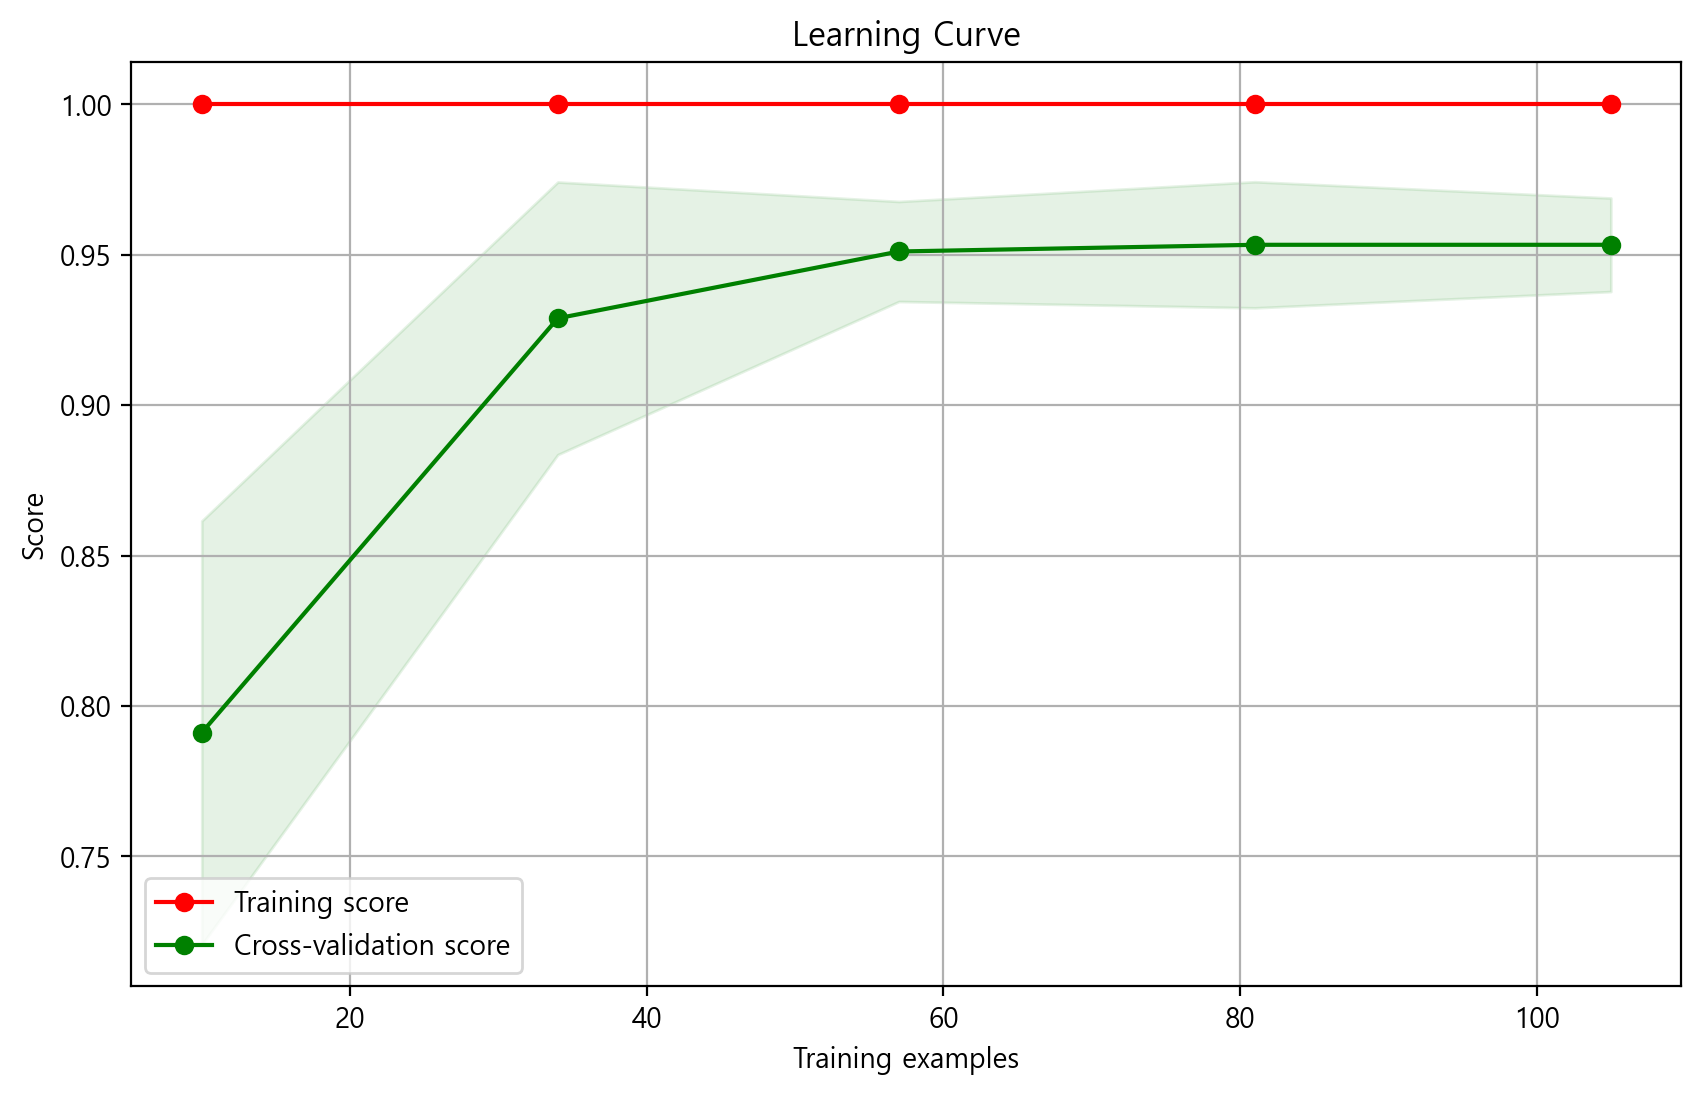

In [29]:
# 의사결정나무 모델에 

# import scikitplot as skplt
from scikitplot.estimators import plot_learning_curve  
from sklearn.model_selection import StratifiedShuffleSplit

cv = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
model = DecisionTreeClassifier(random_state=1234)
plot_learning_curve(model, df_iris.iloc[:, :-1], df_iris.iloc[:, -1], figsize=(10,6), cv=cv)
plt.show()